<a href="https://colab.research.google.com/github/achmad-rufi/Achmad-Ma-rufi-Siddiq.github.io/blob/main/Tubes_literrasi_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitur yang digunakan: ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']


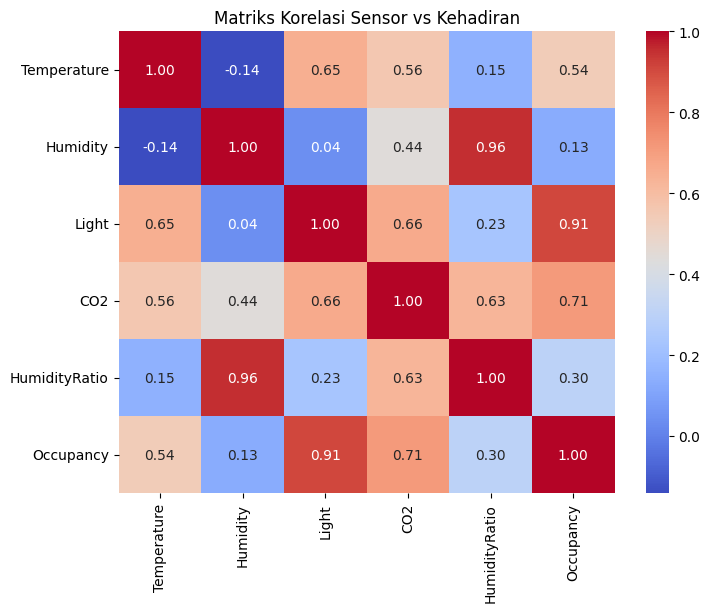

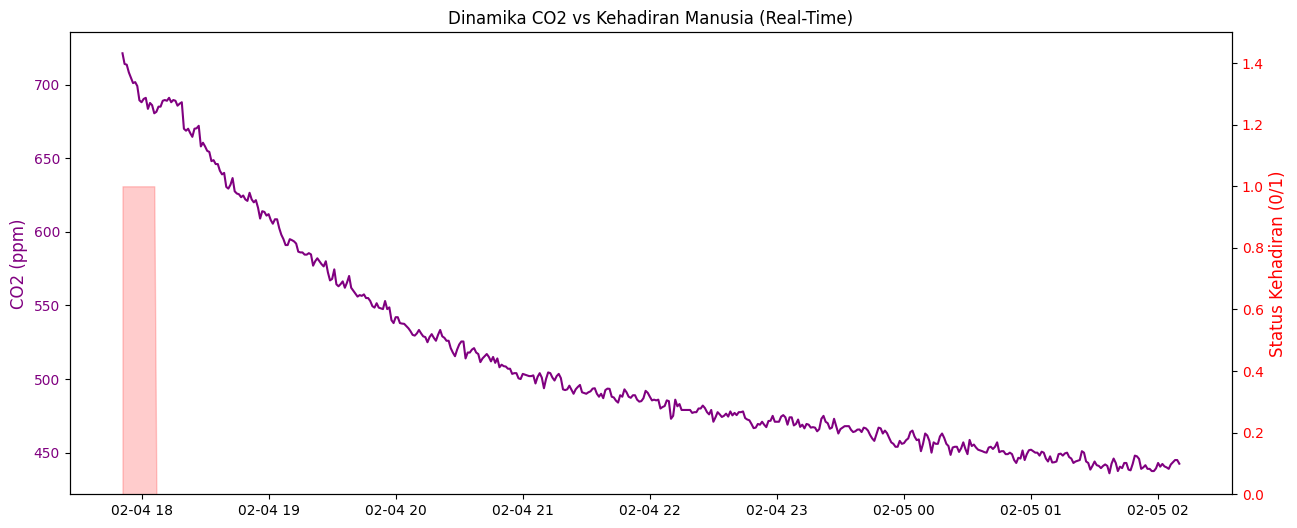


Sedang melatih model...
Pelatihan selesai!

--- LAPORAN EVALUASI ---
Akurasi: 0.9969306322897483


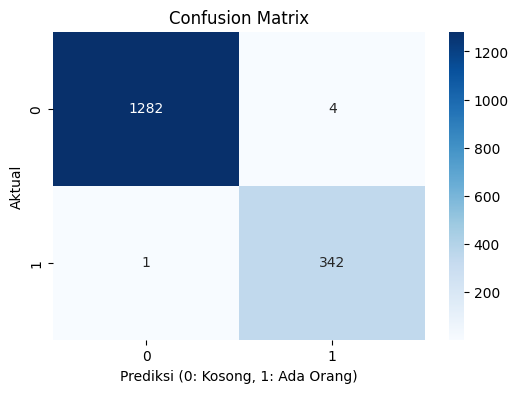

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       0.99      1.00      0.99       343

    accuracy                           1.00      1629
   macro avg       0.99      1.00      1.00      1629
weighted avg       1.00      1.00      1.00      1629

------------------------------------------------
Input -> Suhu: 21.0C, Cahaya: 0Lux, CO2: 410ppm
 DETEKSI: KOSONG
 ACTION: Matikan Listrik (Hemat Energi)
------------------------------------------------


In [ ]:

#  Import Library & Download Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

# Download & Unzip Data
if not os.path.exists('occupancy_data.zip'):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
    !unzip -o occupancy_data.zip

# Load Data (Nama file aslinya datatraining.txt)
df = pd.read_csv('datatraining.txt')



if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

# [Perbaikan 1] Menambahkan 'Light' ke dalam fitur
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
target = 'Occupancy'

X = df[features]
y = df[target]

print("Fitur yang digunakan:", features)



# Plot Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Sensor vs Kehadiran')
plt.show()

# [Prbaikan 2] Menambahkan Plot Time Series (Data Asli/Raw)

plt.figure(figsize=(15, 6))
subset = df.iloc[:500]
# ambil 500 data pertama agar grafik jelas


ax1 = plt.gca()
ax1.plot(subset.index, subset['CO2'], color='purple', label='CO2 (ppm)')
ax1.set_ylabel('CO2 (ppm)', color='purple', fontsize=12)
ax1.tick_params(axis='y', labelcolor='purple')



ax2 = ax1.twinx()
ax2.fill_between(subset.index, 0, subset['Occupancy'], color='red', alpha=0.2, label='Occupancy (Ada Orang)')
ax2.set_ylabel('Status Kehadiran (0/1)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1.5)


plt.title('Dinamika CO2 vs Kehadiran Manusia (Real-Time)')
plt.show()


# Modeling (Random Forest)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
print("\nSedang melatih model...")
model.fit(X_train, y_train)
print("Pelatihan selesai!")


# Evaluasi
y_pred = model.predict(X_test)

print("\n--- LAPORAN EVALUASI ---")
print("Akurasi:", accuracy_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi (0: Kosong, 1: Ada Orang)')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))


# SIMULASI SISTEM

def simulasi_smart_building(temp, hum, light, co2, hum_ratio):
    """
    [PERBAIKAN 3] Input fungsi disesuaikan: harus menerima 'light'
    """
    input_data = pd.DataFrame([[temp, hum, light, co2, hum_ratio]], columns=features)
    prediksi = model.predict(input_data)[0]

    print("------------------------------------------------")
    print(f"Input -> Suhu: {temp}C, Cahaya: {light}Lux, CO2: {co2}ppm")

    if prediksi == 1:
        print(" DETEKSI: ADA ORANG")
        print(" ACTION: Nyalakan Lampu & AC")
    else:
        print(" DETEKSI: KOSONG")
        print(" ACTION: Matikan Listrik (Hemat Energi)")
    print("------------------------------------------------")

#  DEMONSTRASI
# Kasus 1: Ada Orang (Cahaya Terang, CO2 Tinggi)
#simulasi_smart_building(23.5, 28.0, 450, 900, 0.005)

# Kasus 2: Kosong (Gelap, CO2 Rendah/Normal)
simulasi_smart_building(21.0, 22.0, 0, 410, 0.003)

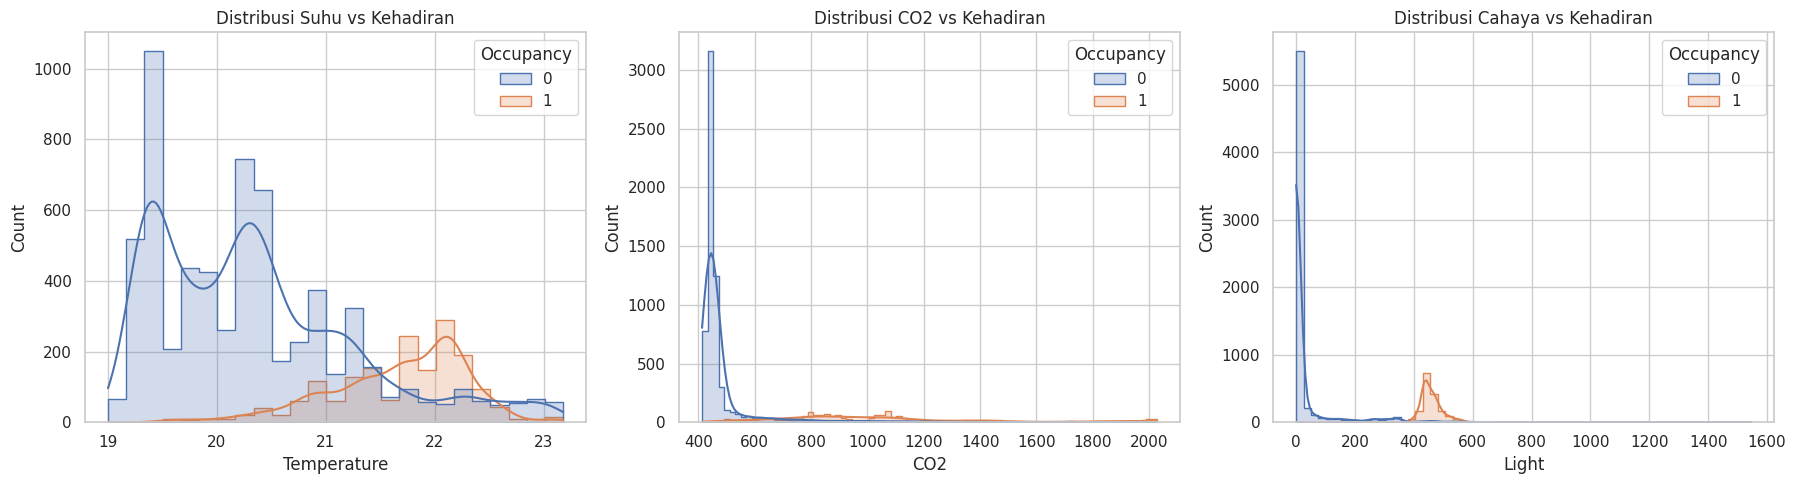

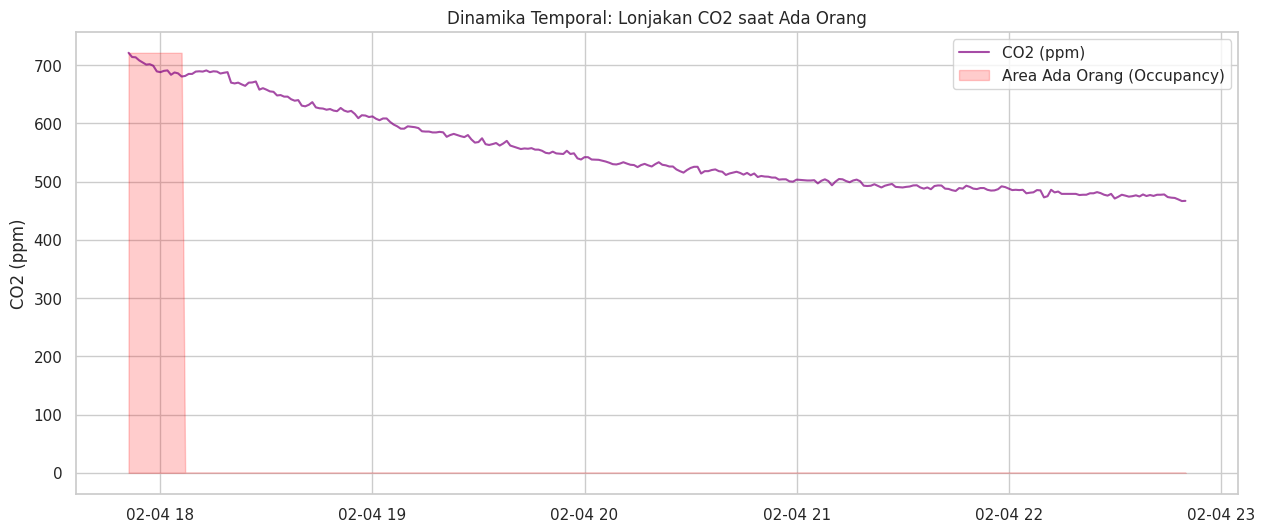

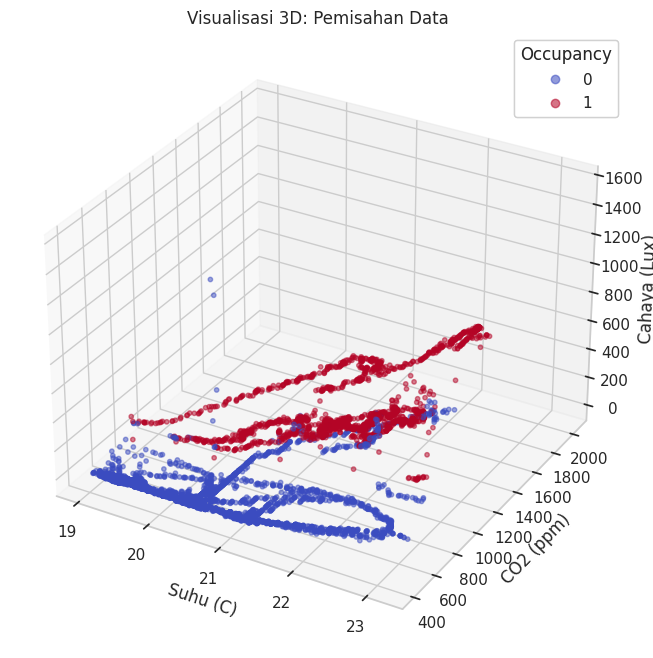

In [ ]:



import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# 1. HISTOGRAM DISTRIBUSI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Temperatur
sns.histplot(data=df, x='Temperature', hue='Occupancy', kde=True, element="step", ax=axes[0])
axes[0].set_title('Distribusi Suhu vs Kehadiran')

# Plot CO2
sns.histplot(data=df, x='CO2', hue='Occupancy', kde=True, element="step", ax=axes[1])
axes[1].set_title('Distribusi CO2 vs Kehadiran')

# Plot Light
sns.histplot(data=df, x='Light', hue='Occupancy', kde=True, element="step", ax=axes[2])
axes[2].set_title('Distribusi Cahaya vs Kehadiran')

plt.tight_layout()
plt.show()


#  sampel 200 data
subset = df.iloc[:300]

plt.figure(figsize=(15, 6))
# Plot CO2 sebagai garis
plt.plot(subset.index, subset['CO2'], label='CO2 (ppm)', color='purple', alpha=0.7)


# kalikan dengan max CO2 agar areanya terlihat penuh
plt.fill_between(subset.index, 0, subset['Occupancy'] * subset['CO2'].max(),
                 color='red', alpha=0.2, label='Area Ada Orang (Occupancy)')

plt.title('Dinamika Temporal: Lonjakan CO2 saat Ada Orang')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.show()

# 3D SCATTER PLOT
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: X=Suhu, Y=CO2, Z=Cahaya
scatter = ax.scatter(df['Temperature'], df['CO2'], df['Light'],
                     c=df['Occupancy'], cmap='coolwarm', s=10, alpha=0.5)

ax.set_xlabel('Suhu (C)')
ax.set_ylabel('CO2 (ppm)')
ax.set_zlabel('Cahaya (Lux)')
ax.set_title('Visualisasi 3D: Pemisahan Data')


legend1 = ax.legend(*scatter.legend_elements(), title="Occupancy")
ax.add_artist(legend1)

plt.show()